### Classification

(reference Chapter 4 ISLR)

In [27]:
#basic imports

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('seaborn-white')

We first load in the Student Default database. See the documentation here: https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/Default


In [2]:
# read the excel file
df = pd.read_excel('Data/Default.xlsx')
df.head()

# response y is default
# predictors are student, balance, income

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


<AxesSubplot:xlabel='default', ylabel='income'>

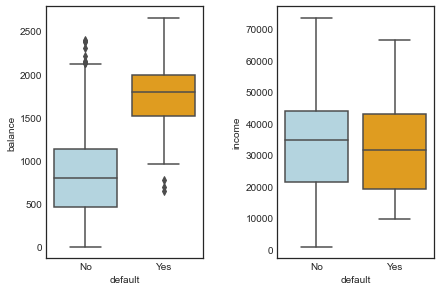

In [3]:
c_palette = {'No':'lightblue', 'Yes':'orange'}

f,(ax1,ax2)=plt.subplots(1,2)
#plt.tight_layout()
plt.tight_layout(pad=1, w_pad=5, h_pad=1.0)
sns.boxplot('default', 'balance', data=df, orient='v',ax=ax1, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v',ax=ax2, palette=c_palette)

In [4]:
#recode the categorical values in default and student columns to numerals
#by adding the 'default2' and 'student2' columns
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(15)
#verify that No is coded as 0 and Yes = 1

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0
4,5,No,No,785.655883,38463.495879,0,0
5,6,No,Yes,919.588530,7491.558572,0,1
6,7,No,No,825.513331,24905.226578,0,0
7,8,No,Yes,808.667504,17600.451344,0,1
8,9,No,No,1161.057854,37468.529288,0,0
9,10,No,No,0.000000,29275.268293,0,0


In [6]:
# Verification that No is coded as 0 and Yes is 1
df.loc[df["default"] == "Yes"]

,Unnamed: 0,default,student,balance,income,default2,student2
136,137,Yes,Yes,1486.998122,17854.397028,1,1
173,174,Yes,Yes,2205.799521,14271.492253,1,1
201,202,Yes,Yes,1774.694223,20359.506086,1,1
206,207,Yes,No,1889.599190,48956.171589,1,0
209,210,Yes,Yes,1899.390626,20655.200003,1,1
...,...,...,...,...,...,...,...
9912,9913,Yes,No,2148.898454,44309.917173,1,0
9921,9922,Yes,Yes,1627.898323,17546.997016,1,1
9949,9950,Yes,No,1750.253150,51578.940163,1,0
9951,9952,Yes,No,1515.606239,48688.512086,1,0


### Logistic Regression (Scikit-Learn)

In [7]:
X_train = df.balance.values.reshape(-1,1) 
y = df.default2
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65133001]


### Logistic Regression (Statsmodel)

In [8]:
X_train = sm.add_constant(df.balance)
est = sm.Logit(y, X_train).fit()

est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


### Question
1. Explain the values obtained especially in relation to the Z and p values
2. Obtain the results using student column and explain the results

In [9]:
# If the value of the z-statistic is big and the p-value is small, the null hypothesis is rejected
X_train = sm.add_constant(df.student2)
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


The probability of default does not depend on student.

The associated p-value is statistically significant.

This will indicate that student[Yes] tend to have higher default probabilities than non-students

### Multiple Logistic Regression (Statsmodel)

In [10]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


### Question
1. Explain the values obtained especially in relation to the Z and p values above

The p-values associated with balance and student is very small which is p < 0.00001 and p < 0.0062 for balance and student respectively. This indicates that balance and student[Yes] are associated with the probability of default.

The negative coefficient for student in MLR indicates that for a fixed value of balance and income, a student is less likely to default than a non-student.

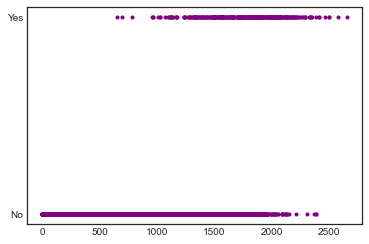

In [22]:
plt.plot(df.balance, df.default, ".", color="purple")

<AxesSubplot:xlabel='balance', ylabel='default2'>

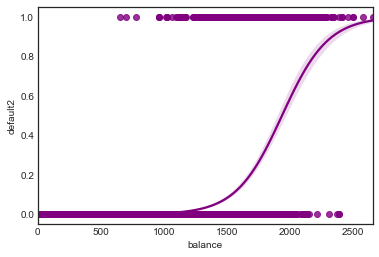

In [24]:
sns.regplot(x="balance", y="default2", data=df, logistic=True, color="purple")

### Linear Discriminant Analysis


In [25]:
#using scikit-learn
X = df[['balance', 'income', 'student2']].values
y = df.default2.values

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')


True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [26]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### <p style="color:red;">Task 6: Questions 1-2 (1 mark)</p>
The above code uses the entire dataset to perform the fit function (Note: the fit function is where the parameters are learnt). For proper testing and evaluation the training and test data should be separated. 

1. Edit the code above so that only training data are used for fit() and predict() uses test data that was not used in training. Print the results out as in the sample above.

2. Comment on the results obtained, i.e. the difference in the results and the reasons for it


In [28]:
# Answer for Question 1
X = df[["balance", "income", "student2"]].values
y = df.default2.values
lda = LinearDiscriminantAnalysis(solver='svd')

# split the data into train and test sets and have the test size be 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=32)

# fit the model with the training data and predict using the test data
y_pred = lda.fit(X_train, y_train).predict(X_test)

# storing the results into a dataframe
# code 0 to No and Yes to 1
# Get the confusion matrix
df_ = pd.DataFrame({"True default status": y_test, "Predicted default status": y_pred})
df_.replace(to_replace={0:"No", 1:"Yes"}, inplace=True)
df_.groupby(["Predicted default status", "True default status"]).size().unstack("True default status")

True default status,No,Yes
Predicted default status,,
No,973,21
Yes,1,5


In [29]:
# Answer for Question 2
# Create the classification report
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99       974
         Yes       0.83      0.19      0.31        26

    accuracy                           0.98      1000
   macro avg       0.91      0.60      0.65      1000
weighted avg       0.98      0.98      0.97      1000



### Question 2:
The LDA produces a precision of 0.97 for the false positive and 0.78 for the true positive when the data has not been split into a train and test set. However, after the split, the LDA produces a precision of 0.98 for the false positive and 0.83 for the true positive.

This means that the LDA produces a higher precision when the data is split compared to when the data is not split. Other than that, the weighted average of the unsplit data is 0.97 while the split data has a weighted average of 0.98.

This indicates that the weighted average of the split data is higher than the weighted average of the unsplit data. Therefore, splitting the data will produce better results compared to the unsplit data because it will prevent overfitting and allows for the model to be evaluated more accurately.

### Quadratic Discriminant Analysis

QDA can be performed with code sample as below:
```
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)
```

KNN can be performed with code sample as below:
```
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
```
The output from both can be printed:
```
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))
```

### <p style="color:red;">Task 6: Questions 3-4 (3 Marks)</p>

Split the dataset into train and test as earlier. Run the QDA and KNN.

3. Compare and comments on the results between LDA,QDA and KNN. 


4. How do we select what K is for KNN? Which K value is best?

hint:
https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a


In [30]:
# Answer for Question 3
qda = QuadraticDiscriminantAnalysis()

# fit the model with the training data and predict using the test data
pred = qda.fit(X_train, y_train).predict(X_test)

# show the confusion matrix and the classification report
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

[[972  21]
 [  2   5]]
              precision    recall  f1-score   support

           0      0.979     0.998     0.988       974
           1      0.714     0.192     0.303        26

    accuracy                          0.977      1000
   macro avg      0.847     0.595     0.646      1000
weighted avg      0.972     0.977     0.970      1000



### Question 3:
Based on the LDA, QDA, and KNN, the results obtained for the weighted average are 0.98, 0.972, and 0.973 respectively. The values of the true positive and false positive obtained from the LDA are 0.83 and 0.98 respectively while the true positive and false positive values obtained from the QDA are 0.714 and 0.979 respectively and lastly, the values of the true positve and false positive obtained from the KNN are 0.800 and 0.978 respectively.

This shows that by using the LDA, the true positive and false positive values of the weighted average is the highest compared to the values obtained from the QDA and KNN.

In [34]:
# Answer for Question 4
seq = [1, 3, 5, 9]

# loop through the sequence and show the classification table for different values of k-neighbours
for i in range(len(seq)):
    knn = neighbors.KNeighborsClassifier(seq[i])
    pred = knn.fit(X_train, y_train).predict(X_test)
    print(confusion_matrix(y_test, pred).T) # print the confusion matrix
    print("\n")
    print(classification_report(y_test, pred, digits=3)) # print the classification report
    print("===============================================================\n")

[[943  20]
 [ 31   6]]


              precision    recall  f1-score   support

           0      0.979     0.968     0.974       974
           1      0.162     0.231     0.190        26

    accuracy                          0.949      1000
   macro avg      0.571     0.599     0.582      1000
weighted avg      0.958     0.949     0.953      1000


[[973  22]
 [  1   4]]


              precision    recall  f1-score   support

           0      0.978     0.999     0.988       974
           1      0.800     0.154     0.258        26

    accuracy                          0.977      1000
   macro avg      0.889     0.576     0.623      1000
weighted avg      0.973     0.977     0.969      1000


[[969  23]
 [  5   3]]


              precision    recall  f1-score   support

           0      0.977     0.995     0.986       974
           1      0.375     0.115     0.176        26

    accuracy                          0.972      1000
   macro avg      0.676     0.555     0.581      10

### Question 4:
K is chosen for the KNN by using the KNN algorithm to select the nearest neighbours according to the plurality of the neighbours' class. The selection for the best K for the KNN is done by observing the precision of the true positive and false positive values along with the values of the weighted average.

The classification report which produces the highest true positive, false positive, and weighted average values will be chosen as the K value for the KNN which in this case, the best K value is 3 due to the true positive, false positive, and weighted values being 0.978, 0.800, and 0.973 respectively which is recorded to be the highest values compared to the other k-neighbouring values.